In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, isfile

# info tables
src_info = f'/data01/homes/dipiano/E4/z60_NLST/crab/sim/merged_data.dat'
bkg_info = f'/data01/homes/dipiano/E4/z60_NLST/background/sim/merged_data.dat'

# dataset 
mapsname = '/data01/homes/dipiano/E4/z60_NLST/detection_50s_5sgm_1000sz.npy'
ds = np.load(mapsname, allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
print(f"Maps: {ds.keys()}")
print(f"SRC dataset size: {len(ds['SRC'])}")
print(f"BKG dataset size: {len(ds['BKG'])}")

Maps: dict_keys(['SRC', 'BKG'])
SRC dataset size: 1000
BKG dataset size: 1000


In [2]:
from astroai.tools.utils import split_dataset

train_data, train_labels, test_data, test_labels = split_dataset(ds, split=80, reshape=True, binning=250)

print(f"Train dataset: {len(train_data)}, {train_data.shape}")
print(f"Train labels: {len(train_labels)}, {train_labels.shape}")
print(f"\nTest dataset: {len(test_data)}, {test_data.shape}")
print(f"Test labels: {len(test_labels)}, {test_labels.shape}")

assert all(train_labels[:int(len(train_labels)/2)]) == 1
assert all(train_labels[int(len(train_labels)/2):]) == 0
assert all(test_labels[:int(len(test_labels)/2)]) == 1
assert all(test_labels[int(len(test_labels)/2):]) == 0

Train dataset: 1600, (1600, 250, 250, 1)
Train labels: 1600, (1600, 1)

Test dataset: 400, (400, 250, 250, 1)
Test labels: 400, (400, 1)


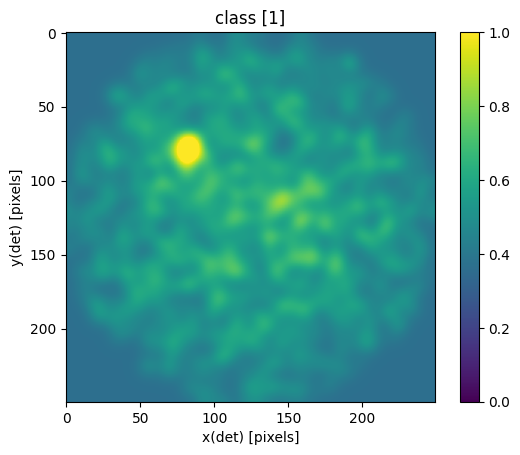

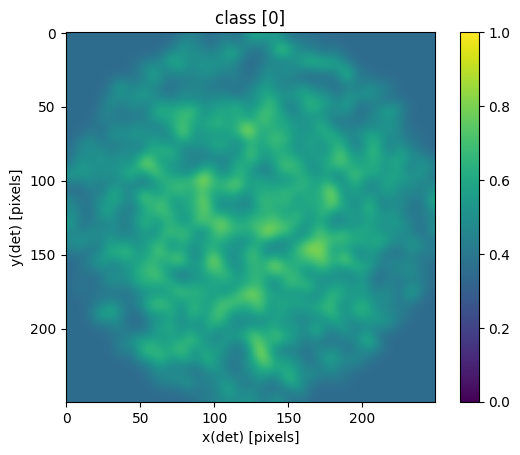

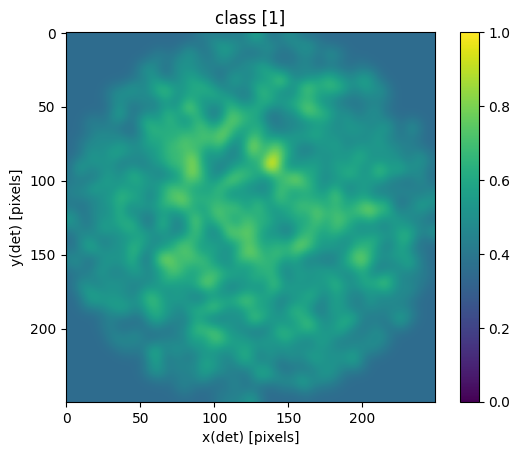

In [3]:
from astroai.tools.utils import plot_heatmap

idx = 600
plot_heatmap(train_data[0], title=f'class {train_labels[0]}', show=True, save=False, save_name=None)
plot_heatmap(train_data[-1], title=f'class {train_labels[-1]}', show=True, save=False, save_name=None)
plot_heatmap(train_data[idx], title=f'class {train_labels[idx]}', show=True, save=False, save_name=None)

In [ ]:
import tensorflow as tf
from astroai.models.cnn import create_cnn_regressor
TF_CPP_MIN_LOG_LEVEL="1"

# seed
tf.random.set_seed(42)
np.random.seed(42)

# create model
model = create_cnn_binary_regressor()
model.summary()